In [14]:
# import all of the necessary packages for muliple regressors
# not all of these are necessary for every experiment
import pandas as pd
import numpy as np
import numpy
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ARDRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import ExtraTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm.classes import OneClassSVM
from sklearn.neighbors.classification import RadiusNeighborsClassifier
from sklearn.neighbors.classification import KNeighborsClassifier
from sklearn.multioutput import ClassifierChain
from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model.stochastic_gradient import SGDClassifier
from sklearn.linear_model.ridge import RidgeClassifierCV
from sklearn.linear_model.ridge import RidgeClassifier
from sklearn.linear_model.passive_aggressive import PassiveAggressiveClassifier
from sklearn.gaussian_process.gpc import GaussianProcessClassifier
from sklearn.ensemble.weight_boosting import AdaBoostClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.ensemble.bagging import BaggingClassifier
from sklearn.ensemble.forest import ExtraTreesClassifier
from sklearn.ensemble.forest import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.naive_bayes import BernoulliNB
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import GaussianNB
from sklearn.semi_supervised import LabelPropagation
from sklearn.semi_supervised import LabelSpreading
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegressionCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import NearestCentroid
from sklearn.svm import NuSVC
from sklearn.linear_model import Perceptron
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import LabelEncoder
from sklearn.base import ClassifierMixin
from sklearn.utils.testing import all_estimators
import warnings
warnings.filterwarnings('ignore')
#import numpy as np
#import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
#import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import decomposition
import xgboost as xgb
# Fixing random state for reproducibility
np.random.seed(19680801)

In [15]:
#specify all the files we want to process in a list

top_genes = [
             "Top_1000_Fly_Genes.csv",
             "Top_1000_Human_Genes.csv"
            ]
#lists_of_data = [all_genes]

In [16]:
#specify a list of all regression models to test out
regression_models = [
                     #LogisticRegression(),
                     #LinearRegression(),
                     #ARDRegression(),
                     #MultinomialNB(),
                     #Lasso(),
                     #Ridge(),
                     #SVC(),
                     #GradientBoostingRegressor(),
                     #RandomForestRegressor(),
                     #ExtraTreesRegressor(),
                     xgb.XGBRegressor(silent=True),
                     #LinearDiscriminantAnalysis(),
                     #sklearn.linear_model.HuberRegressor(),
                     #sklearn.ensemble.AdaBoostRegressor()
                     ]

Training and testing on 1000 data splits (75% training / 25% testing)
999
Top_1000_Fly_Genes.csv using XGBRegressor(silent=True) 

The average mean squared error is :  20.75743931305878
The average median absolute error is :  0.5212642040252685
The average mean absolute error is :  2.1077894133373545
The median R squared is :  0.9455149031978928
The mean R squared is :  0.9191157946527633

95.0 R^2 confidence interval 73.0% and 99.1%
999
Top_1000_Human_Genes.csv using XGBRegressor(silent=True) 

The average mean squared error is :  217.32853385625756
The average median absolute error is :  8.173432046890259
The average mean absolute error is :  10.769244628840479
The median R squared is :  0.6244908835910035
The mean R squared is :  0.6156894984819208

95.0 R^2 confidence interval 34.1% and 82.8%


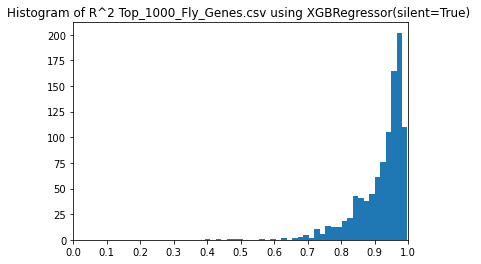

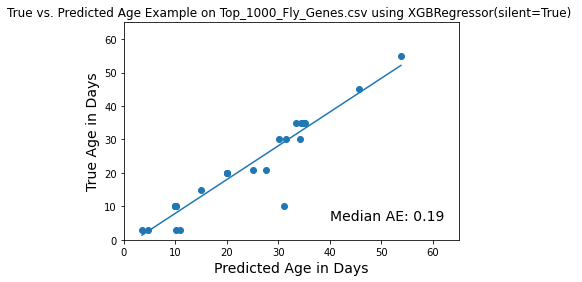

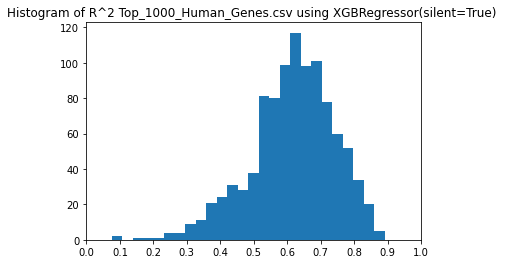

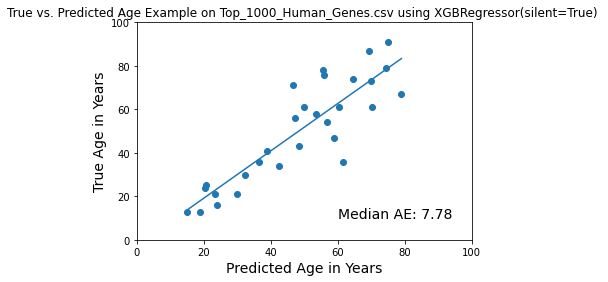

In [17]:
#all_genes regression

print("Training and testing on 1000 data splits (75% training / 25% testing)")
#load all data
import numpy
import statistics
#create individual datasets of each species
for file in top_genes:
    # read file, pull out ages, remove ages&groups
    # read file and transpose (ensuring numerical data)
    raw_df = pd.read_csv(file, header=None).T
    header = raw_df.iloc[0]
    raw_df = raw_df[1:].apply(pd.to_numeric, errors='ignore')
    raw_df.columns = header
    
    # debug/checking
    #print("\n",raw_df.head(),"\n")
    #print("\n",raw_df.info(),"\n")
    #print("\n",raw_df['Age'],"\n")
    
    # get the ages and encode to integers for use in the classification
    ages = raw_df['Age'].astype(int)
    
    # drop ages and groups from the dataframe
    raw_df_dropped = raw_df.drop(columns=["Age","Group","Sample"])
        
    for regression_model in regression_models:
        #define lists to hold our results from each algorithim
        r_square = list()
        median_score = list()
        mean_score = list()
        mean_squares = list()

        # run bootstrap
        n_iterations = 1000
        for i in range(n_iterations):
            # show progress
            print('\r' + str(i),end = '')
            
            #define the data with a new slice of the data
            train_x, test_x, train_y, test_y = train_test_split(raw_df_dropped, ages, test_size=0.25, random_state=i)
            
            # set the model
            model_for_use = regression_model
            
            #fit the model on the training data
            model_for_use.fit(train_x, train_y)
            
            #predict the ages on the test data
            predicted_ages = model_for_use.predict(test_x)
            
            #append the scores to lists to report mean values
            r_square.append(sklearn.metrics.r2_score(test_y, predicted_ages))
            mean_squares.append(mean_squared_error(test_y, predicted_ages))
            median_score.append(sklearn.metrics.median_absolute_error(test_y, predicted_ages))
            mean_score.append(sklearn.metrics.mean_absolute_error(test_y, predicted_ages))

        print("\n{} using {} ".format(file, regression_model))
        print("\nThe average mean squared error is : ",statistics.mean(mean_squares))
        print("The average median absolute error is : ",statistics.mean(median_score))
        print("The average mean absolute error is : ",statistics.mean(mean_score))
        print("The median R squared is : ",statistics.median(r_square))
        print("The mean R squared is : ",statistics.mean(r_square))
    
        alpha = 0.95
        p = ((1.0-alpha)/2.0) * 100
        lower = max(0.0, numpy.percentile(r_square, p))
        p = (alpha+((1.0-alpha)/2.0)) * 100
        upper = min(1.0, numpy.percentile(r_square, p))
        print('\n%.1f R^2 confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))
        
        # plot the histograms
        #histo = numpy.histogram(r_square)
        plt.figure()
        _ = plt.hist(r_square, bins='auto')
        plt.xlim(0,1)
        plt.xticks(np.arange(0, 1.1, 0.1))
        # save
        plt.savefig("Regress1000Hist_"+file.rsplit( ".", 1 )[ 0 ]+".png", dpi=300)
        # title for notebook display
        plt.title("Histogram of R^2 {} using {} ".format(file, regression_model))
        
        # plot the last iteration test data
        plt.figure()
        plt.scatter(predicted_ages,test_y)
        plt.plot(np.unique(predicted_ages), np.poly1d(np.polyfit(predicted_ages, test_y, 1))(np.unique(predicted_ages)))
        if "human" in file.lower():
            plt.xlim(0,100)
            plt.ylim(0,100)
            plt.text(60,10,"Median AE: {:.2f}".format(median_score[-1]),fontsize=14)
        elif "fly" in file.lower():
            plt.xlim(0,65)
            plt.ylim(0,65)
            plt.text(40,6,"Median AE: {:.2f}".format(median_score[-1]),fontsize=14)
        # save
        plt.savefig("Regress1000Example_"+file.rsplit( ".", 1 )[ 0 ]+".png", dpi=300)
        # title and labels for notebook display
        plt.title("True vs. Predicted Age Example on {} using {} ".format(file, regression_model))
        if "human" in file.lower():
            plt.xlabel("Predicted Age in Years",fontsize=14)
            plt.ylabel("True Age in Years",fontsize=14)
        elif "fly" in file.lower():
            plt.xlabel("Predicted Age in Days",fontsize=14)
            plt.ylabel("True Age in Days",fontsize=14)
        
        